# Аналитика в авиакомпании

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## План выполнения работ
#### [Шаг 1. Откройте файл с данными и изучите общую информацию ](#step1)
#### [Шаг 2. Подготовьте данные](#step2)
#### [Шаг 3. Выбрать топ-10 городов по количеству рейсов](#step3)
#### [Шаг 4. Постороить графики](#step4)
#### [Шаг 5. Общий вывод](#step5)


## <a id="step1">Шаг 1. Откройте файл с данными и изучите общую информацию </a>

### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import seaborn as sns
from scipy import stats as st
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)

### Рассмотрим полученные данные query_1.csv

In [2]:
aircraft = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum5/query_1.csv')
#aircraft = pd.read_csv('/datasets/query_1.csv')

In [3]:
print('\nРассмотрим общую информацию')
aircraft.info()
print('\nРассмотрим первые 10 строк')
display(aircraft.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
aircraft.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes

Рассмотрим первые 10 строк


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185



Рассмотрим описательную статистику нашего DataFrame


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


##### Описание  данных

`model` — модель самолета

`flights_amount` — количество полетов

### Рассмотрим полученные данные query_3.csv

In [4]:
avg_flights = pd.read_csv('/Users/vladimrogulo/PycharmProjects/Praktikum5/query_3.csv')
#avg_flights = pd.read_csv('/datasets/query_3.csv')

In [5]:
print('\nРассмотрим общую информацию')
avg_flights.info()
print('\nРассмотрим первые 10 строк')
display(avg_flights.head(10))
print('\nРассмотрим описательную статистику нашего DataFrame')
avg_flights.describe()


Рассмотрим общую информацию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB

Рассмотрим первые 10 строк


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000



Рассмотрим описательную статистику нашего DataFrame


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


##### Описание  данных

`city` — наименование города

`average_flights` —  среднее количество прибывающих рейсов в день  

#### Вывод

Импортировали файлы и изучили их. Пропусков в 2х файлов не наблюдается.

## <a id="step2">Шаг 2. Подготовьте данные </a>

### Приведем столбцы к city в avg_flights к нижнему регистру. Проверим на дубликаты

In [6]:
avg_flights['city'] = avg_flights['city'].str.lower()

In [7]:
print('Количество дубликатов:', avg_flights['city'].duplicated().sum())

Количество дубликатов: 0


#### Округлим значения в столбце average_flights

In [39]:
avg_flights['average_flights'] = avg_flights['average_flights'].round()
avg_flights['average_flights'] = avg_flights['average_flights'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             101 non-null    object
 1   average_flights  101 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


None

#### Вывод

Привели столбец с названием городов к ниженему регистру и провели на дубликаты. Дубликатов городов нет.

Привели столбец average_flights к целым числам

## <a id="step3">Шаг 3. Выбрать топ-10 городов по количеству рейсов </a>

In [40]:
tmp_avg_flights = avg_flights.sort_values(by='average_flights',ascending = False).reset_index(drop=True)
avg_flights_top_10 = tmp_avg_flights.loc[0:9]
display(avg_flights_top_10)

,city,average_flights
0,москва,130
1,санкт-петербург,31
2,новосибирск,17
3,красноярск,12
4,екатеринбург,11
5,ростов-на-дону,10
6,сочи,10
7,ульяновск,10
8,пермь,10
9,брянск,10


#### Вывод 

Выбрали топ-10 городов по среднему количеству рейсов, прибывающих в город city за день в августе 2018 года

## <a id="step4">Шаг 4. Посторить графики  </a>

#### Построим график: модели самолетов и количество рейсов

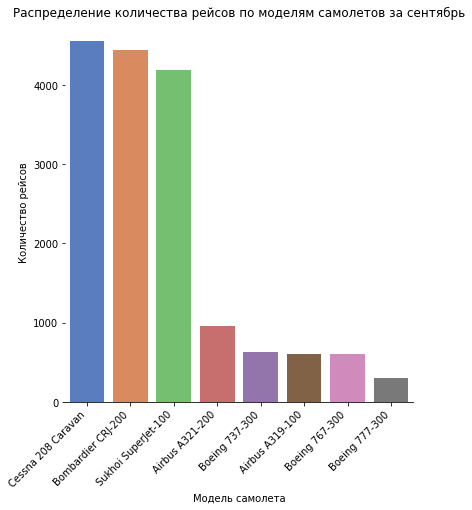

In [41]:
g = sns.catplot(x='model', y='flights_amount', 
                data=aircraft.sort_values(by='flights_amount',ascending = False).reset_index(drop=True), 
                height=6, kind="bar",palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=45,horizontalalignment='right')
g.set(title='Распределение количества рейсов по моделям самолетов за сентябрь')
g.set(xlabel='Модель самолета', ylabel='Количество рейсов')

#### Вывод
Лидерами в сентябре 2018г.по количеству рейсов стали: Bombardier Cessna 208 Caravan (4557), CRJ-200 (4446), Sukhoi SuperJet-100 (4185)

#### Построим график: города и количество рейсов

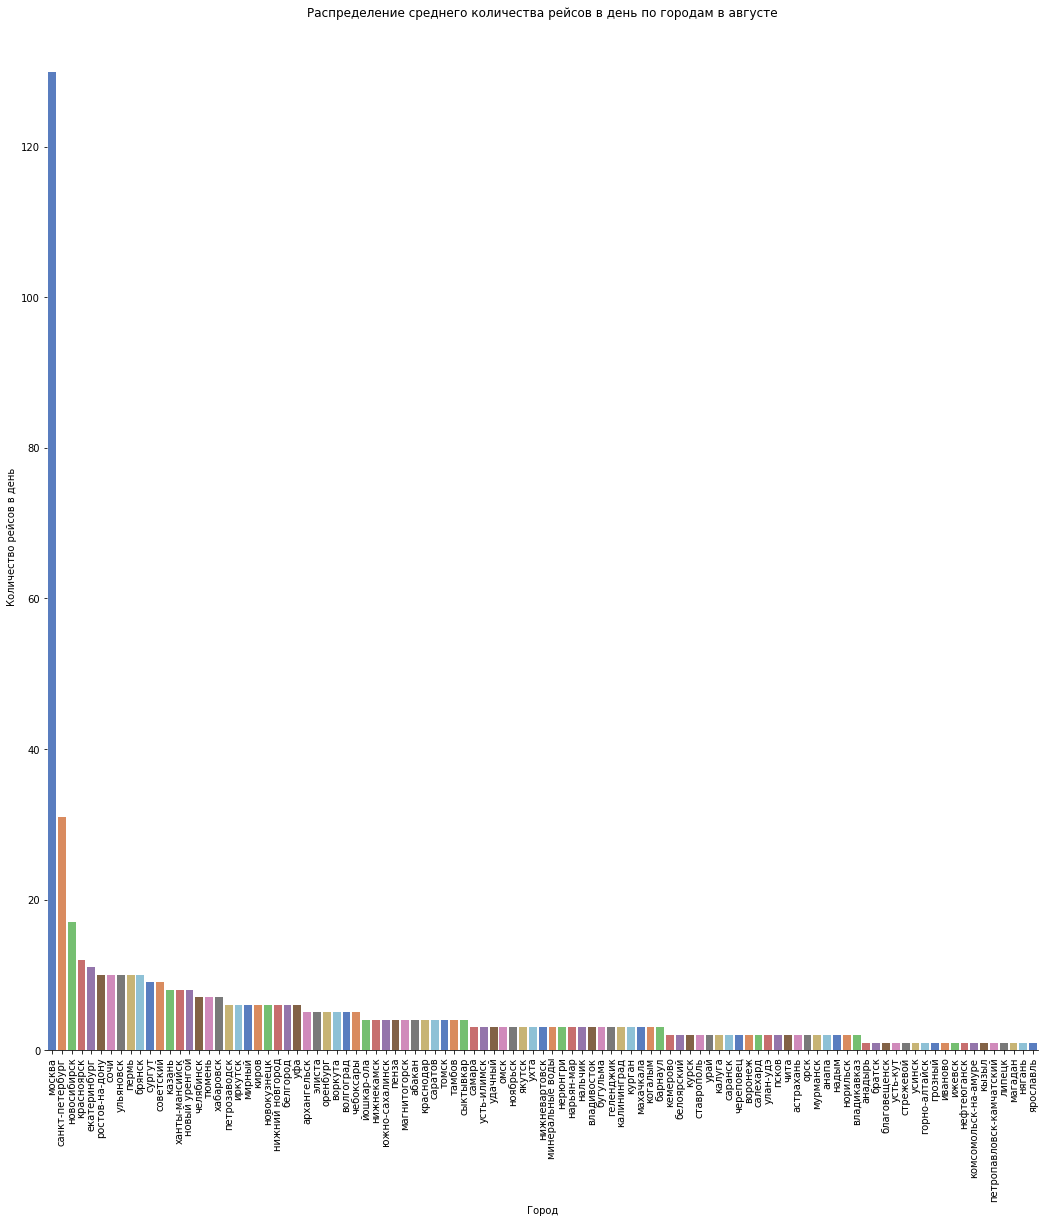

In [42]:
g = sns.catplot(x='city', y='average_flights', data=tmp_avg_flights, height=15, kind="bar",palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(title='Распределение среднего количества рейсов в день по городам в августе')
g.set(xlabel='Город', ylabel='Количество рейсов в день')

#### Вывод
Медиана составляет 3 рейса. Видно, что в большинстве городов количество рейсов не превышает 10.

#### Построим график: топ-10 городов и количество рейсов

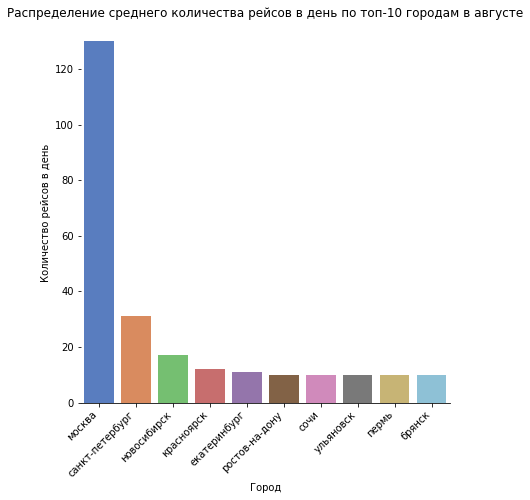

In [43]:
g = sns.catplot(x='city', y='average_flights', data=avg_flights_top_10, height=6, kind="bar",palette="muted")
g.despine(left=True)
g.set_xticklabels(rotation=45, horizontalalignment='right')
g.set(title='Распределение среднего количества рейсов в день по топ-10 городам в августе')
g.set(xlabel='Город', ylabel='Количество рейсов в день')

#### Вывод
Москва является не только столицей, но и отправной точкой в России. Среднее количество рейсов в августе 2018г.  составляло 130. в Санкт-Петербурге среднее количество составило - 31, а в Новосибирске  - 17. Эти города являются самыми большими по численности в России.

### Вывод

В данной работе мы импортировали файлы и изучили информацию по ним. Пропусков и дубликатов мы не обнаружили. В столбце average_flights мы округлили значения и привели к типу int (целые числа).

На основании имеющихся данных мы определили топ-10 городов с высоким средним числом рейсов в день. 

Далее мы построили графики зависимостей: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

Из графиков видно, что наиболее эксплуатируемыми самолетами в сентябре 2018г. стали Bombardier Cessna 208 Caravan	(4557), CRJ-200	(4446), Sukhoi SuperJet-100	(4185).

В августе среднее количество рейсов в день в Москве достигало 130. В остальных городах России, не считая Топ-10, количество рейсов составляет не более 10 в день.

